In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [133]:
dataset = pd.read_csv('maotai-train.csv',index_col="trade_date",parse_dates=True)

In [134]:
print(dataset.head(5))

              open    high     low   close        vol
trade_date                                           
2017-12-29  718.00  726.50  691.60  697.49   76038.87
2017-12-28  687.00  719.90  671.32  718.69  124141.07
2017-12-27  684.86  684.86  662.50  664.18   37722.05
2017-12-26  688.18  692.99  676.50  680.81   31867.66
2017-12-25  686.00  696.30  683.72  688.12   36214.28


In [135]:
#按交易日期重新排序
dataset=dataset.sort_index()
print(dataset)

              open    high     low   close        vol
trade_date                                           
2014-01-02  127.99  127.99  125.60  125.98   21976.66
2014-01-03  125.25  125.80  123.23  123.98   23341.65
2014-01-06  122.88  124.90  120.70  120.73   30229.21
2014-01-07  120.11  121.35  119.20  120.56   18039.46
2014-01-08  120.49  121.18  118.01  119.40   31989.59
...            ...     ...     ...     ...        ...
2017-12-25  686.00  696.30  683.72  688.12   36214.28
2017-12-26  688.18  692.99  676.50  680.81   31867.66
2017-12-27  684.86  684.86  662.50  664.18   37722.05
2017-12-28  687.00  719.90  671.32  718.69  124141.07
2017-12-29  718.00  726.50  691.60  697.49   76038.87

[977 rows x 5 columns]


In [136]:
#检查是否有空值
dataset.isnull().any()

open     False
high     False
low      False
close    False
vol      False
dtype: bool

In [137]:
#查看数据类型
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 977 entries, 2014-01-02 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    977 non-null    float64
 1   high    977 non-null    float64
 2   low     977 non-null    float64
 3   close   977 non-null    float64
 4   vol     977 non-null    float64
dtypes: float64(5)
memory usage: 45.8 KB


In [138]:
#特征缩放
from sklearn.preprocessing import MinMaxScaler

In [139]:
#单维，对close价格进行预测
trainingset=pd.DataFrame(dataset['close'])
transfer=MinMaxScaler(feature_range=[0,1])
trainingset_scaled = transfer.fit_transform(trainingset)

In [140]:
#设置常量
time_step=20     #时间步

In [141]:
#训练集
train_x,train_y=[],[]
for i in range(len(trainingset_scaled)-time_step-1):
    train_x.append(trainingset_scaled[i:i+time_step])
    train_y.append(trainingset_scaled[i+1:i+time_step+1])
#调整训练集格式
train_x,train_y=np.array(train_x),np.array(train_y)
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))

In [142]:
#建立神经网络

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [143]:
regressor=Sequential()
# 第一层lstm
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_x.shape[1], 1)))
regressor.add(Dropout(0.2))

# 第二层
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 第三层
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# 第四层
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# 输出层
regressor.add(Dense(units = 1))


In [144]:
# 使用adam优化器
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(train_x, train_y, epochs = 100, batch_size = 20)

Epoch 1/100
48/48 [==============================] - 6s 20ms/step - loss: 0.0120
Epoch 2/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 3/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 4/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 5/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 6/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 7/100
48/48 [==============================] - 1s 19ms/step - loss: 0.0016
Epoch 8/100
48/48 [==============================] - 1s 26ms/step - loss: 0.0015
Epoch 9/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 10/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 11/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 12/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 13/100
48/48 [=====

48/48 [==============================] - 1s 30ms/step - loss: 6.9148e-04
Epoch 99/100
48/48 [==============================] - 1s 21ms/step - loss: 7.3163e-04
Epoch 100/100
48/48 [==============================] - 1s 29ms/step - loss: 7.1295e-04


In [145]:
dataset_test = pd.read_csv('maotai-test.csv',index_col="trade_date",parse_dates=True)
dataset_test=dataset_test.sort_index()

In [146]:

dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2018-01-02 to 2018-03-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    59 non-null     float64
 1   high    59 non-null     float64
 2   low     59 non-null     float64
 3   close   59 non-null     float64
 4   vol     59 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


              open    high     low   close        vol   predicted
trade_date                                                       
2018-01-02  700.00  710.16  689.89  703.85   49612.48  668.009766
2018-01-03  701.50  721.40  699.74  715.86   52019.41  671.670532
2018-01-04  721.40  743.50  719.33  737.07   72205.08  675.583496
2018-01-05  741.00  746.03  728.22  738.36   39989.07  679.996338
2018-01-08  735.02  756.50  735.02  752.13   52204.56  685.007935
2018-01-09  752.21  783.00  752.21  782.52   64591.95  690.495667
2018-01-10  785.00  788.88  773.48  785.71   47714.24  696.609070
2018-01-11  787.00  788.00  772.00  774.81   50656.07  703.739624
2018-01-12  773.77  788.80  767.02  788.42   45988.24  711.437378
2018-01-15  793.46  799.06  779.02  785.37   52473.13  719.663818
2018-01-16  780.48  788.61  768.00  772.94   65428.33  728.110413
2018-01-17  770.00  774.00  738.51  747.93   90709.54  736.119263
2018-01-18  747.93  765.00  744.09  750.74   58978.51  743.316345
2018-01-19

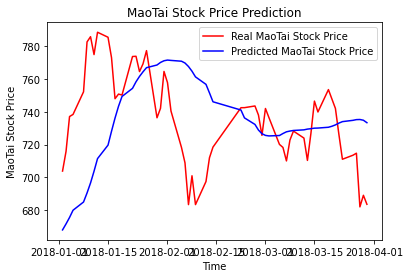

In [153]:
# 预测2018年股价
dataset_total = pd.concat((dataset['close'], dataset_test['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_step:].values
inputs = inputs.reshape(-1,1)

inputs=transfer.fit_transform(inputs)

X_test = []
for i in range(time_step,len(dataset_test)+time_step):
    X_test.append(inputs[i-time_step:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = transfer.inverse_transform(predicted_stock_price)

dataset_test["predicted"]=predicted_stock_price
print(dataset_test)


plt.plot(dataset_test['close'], color = 'red', label = 'Real MaoTai Stock Price')
plt.plot(dataset_test['predicted'], color = 'blue', label = 'Predicted MaoTai Stock Price')
plt.title('MaoTai Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MaoTai Stock Price')
plt.legend()
plt.show()
